In [19]:
!pip install pandas fredapi numpy matplotlib seaborn plotly prophet scikit-learn statsmodels



# STEP 2: Import Libraries

In [20]:
import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")


✅ All libraries imported successfully!
Pandas version: 2.3.2


In [2]:
import pandas as pd
from fredapi import Fred
fred = Fred(api_key='e1ab1d32d6233f0589e41d8a74f37174')
# Collect data
unemployment = fred.get_series('UNRATE')
cpi = fred.get_series('CPIAUCSL')
gdp = fred.get_series('GDP')
dff = fred.get_series('DFF')
consumer = fred.get_series('UMCSENT')


# Combine into dataframe
economic_data = pd.DataFrame({
'unemployment': unemployment,
'cpi': cpi,
'gdp': gdp,
'dff': dff,
'consumer' : consumer
})

# ============================================
# STEP 3: Set Up FRED API
# Get your free API key from: https://fred.stlouisfed.org/docs/api/api_key.html
# ============================================


In [23]:
# Replace 'YOUR_API_KEY_HERE' with your actual FRED API key
FRED_API_KEY = '54a6578aaa4821d9a2973db16ebb629f'

print("✅ FRED API initialized!")



✅ FRED API initialized!


# ============================================
# STEP 4: Test the Connection
# ============================================

In [24]:
# Test by fetching unemployment rate data
try:
    unemployment = fred.get_series('UNRATE', observation_start='2020-01-01')
    print(f"✅ Successfully fetched {len(unemployment)} data points for unemployment rate")
    print(f"\nLatest unemployment rate: {unemployment.iloc[-1]:.1f}%")
    print(f"Date: {unemployment.index[-1].strftime('%B %Y')}")
except Exception as e:
    print(f"❌ Error: {e}")
    print("Make sure you've replaced 'YOUR_API_KEY_HERE' with your actual API key")


✅ Successfully fetched 69 data points for unemployment rate

Latest unemployment rate: 4.4%
Date: September 2025


# ============================================
# STEP 5: Fetch Multiple Economic Indicators
# ============================================


In [25]:
def fetch_economic_data(start_date='2010-01-01'):
    """
    Fetch key economic indicators from FRED
    
    Parameters:
    -----------
    start_date : str
        Start date for data collection (format: 'YYYY-MM-DD')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with all economic indicators
    """
    
    indicators = {
        'UNRATE': 'Unemployment Rate',
        'CPIAUCSL': 'Consumer Price Index',
        'GDP': 'Gross Domestic Product',
        'FEDFUNDS': 'Federal Funds Rate',
        'HOUST': 'Housing Starts',
        'UMCSENT': 'Consumer Sentiment',
        'INDPRO': 'Industrial Production',
        'PAYEMS': 'Total Nonfarm Payrolls'
    }
    
    data_dict = {}
    
    print("Fetching economic indicators from FRED...")
    for code, name in indicators.items():
        try:
            series = fred.get_series(code, observation_start=start_date)
            data_dict[name] = series
            print(f"✅ {name}: {len(series)} observations")
        except Exception as e:
            print(f"❌ {name}: Error - {e}")


In [26]:
def fetch_economic_data(start_date='2010-01-01'):
    """
    Fetch key economic indicators from FRED
    
    Parameters:
    -----------
    start_date : str
        Start date for data collection (format: 'YYYY-MM-DD')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with all economic indicators
    """
    
    indicators = {
        'UNRATE': 'Unemployment Rate',
        'CPIAUCSL': 'Consumer Price Index',
        'GDP': 'Gross Domestic Product',
        'FEDFUNDS': 'Federal Funds Rate',
        'HOUST': 'Housing Starts',
        'UMCSENT': 'Consumer Sentiment',
        'INDPRO': 'Industrial Production',
        'PAYEMS': 'Total Nonfarm Payrolls'
    }
    
    data_dict = {}
    
    print("Fetching economic indicators from FRED...")
    for code, name in indicators.items():
        try:
            series = fred.get_series(code, observation_start=start_date)
            data_dict[name] = series
            print(f"✅ {name}: {len(series)} observations")
        except Exception as e:
            print(f"❌ {name}: Error - {e}")
    
    # Combine into DataFrame
    df = pd.DataFrame(data_dict)
    
    print(f"\n✅ Total data shape: {df.shape}")
    print(f"Date range: {df.index.min().date()} to {df.index.max().date()}")
    
    return df

In [27]:
# Fetch the data
economic_data = fetch_economic_data()


Fetching economic indicators from FRED...
✅ Unemployment Rate: 189 observations
✅ Consumer Price Index: 189 observations
✅ Gross Domestic Product: 62 observations
✅ Federal Funds Rate: 190 observations
✅ Housing Starts: 188 observations
✅ Consumer Sentiment: 190 observations
✅ Industrial Production: 188 observations
✅ Total Nonfarm Payrolls: 189 observations

✅ Total data shape: (190, 8)
Date range: 2010-01-01 to 2025-10-01


In [28]:
# Display first few rows
print("\n📊 Sample of Economic Data:")
economic_data.head()



📊 Sample of Economic Data:


,Unemployment Rate,Consumer Price Index,Gross Domestic Product,Federal Funds Rate,Housing Starts,Consumer Sentiment,Industrial Production,Total Nonfarm Payrolls
2010-01-01,9.8,217.488,14764.610,0.11,614.0,74.4,89.1897,129802.0
2010-02-01,9.8,217.281,NaN,0.13,604.0,73.6,89.5046,129705.0
2010-03-01,9.9,217.353,NaN,0.16,636.0,73.6,90.1356,129865.0
2010-04-01,9.9,217.403,14980.193,0.20,687.0,72.2,90.4607,130120.0
2010-05-01,9.6,217.290,NaN,0.20,583.0,73.6,91.7014,130643.0


# ============================================
# STEP 6: Quick Data Visualization
# ============================================


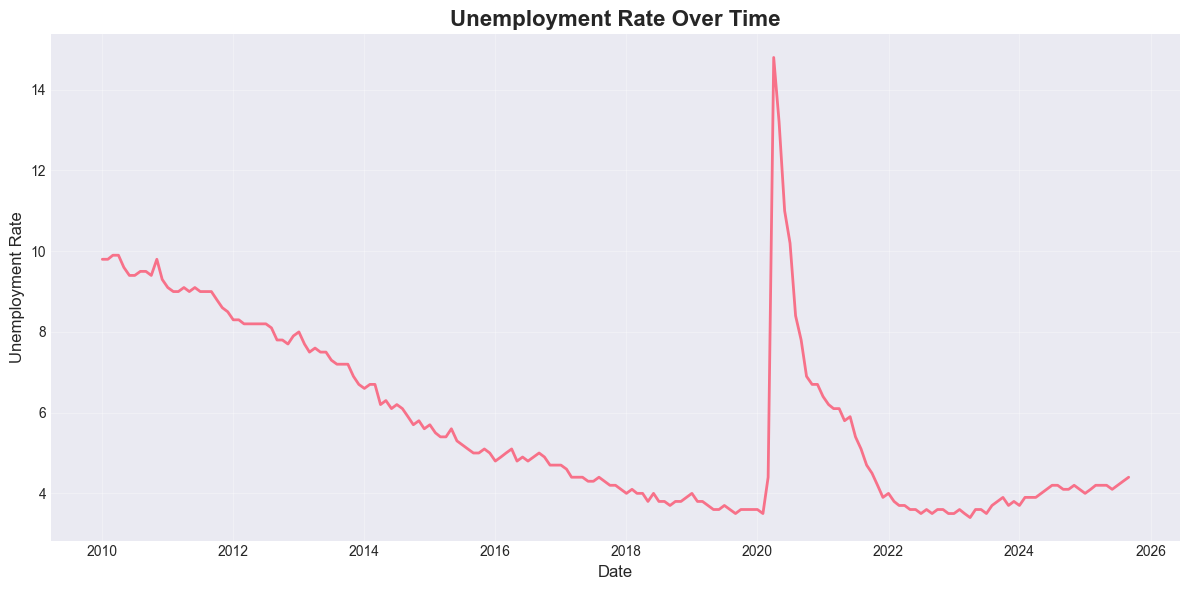

In [29]:
def plot_economic_indicator(df, column_name):
    """
    Create a simple time series plot
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column_name], linewidth=2)
    plt.title(f'{column_name} Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example: Plot unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    plot_economic_indicator(economic_data, 'Unemployment Rate')


# ============================================
# STEP 7: Data Summary Statistics
# ============================================


In [30]:
print("\n📈 Summary Statistics:")
print(economic_data.describe())

print("\n🔍 Missing Values:")
print(economic_data.isnull().sum())

print("\n📅 Data Frequency:")
print(f"Total observations: {len(economic_data)}")
print(f"Date range: {(economic_data.index.max() - economic_data.index.min()).days} days")



📈 Summary Statistics:
       Unemployment Rate  Consumer Price Index  Gross Domestic Product  \
count         189.000000            189.000000               62.000000   
mean            5.721693            257.325614            20883.681113   
std             2.209651             31.246571             4606.917964   
min             3.400000            217.199000            14764.610000   
25%             3.900000            234.719000            17193.448750   
50%             4.900000            247.284000            19825.443000   
75%             7.500000            276.528000            23843.261750   
max            14.800000            324.368000            30485.729000   

       Federal Funds Rate  Housing Starts  Consumer Sentiment  \
count          190.000000      188.000000          190.000000   
mean             1.390632     1161.276596           79.573684   
std              1.806831      317.727270           13.516799   
min              0.050000      517.000000         

# ============================================
# BONUS: Save Data to CSV
# ============================================


In [31]:
# Save to CSV for future use
economic_data.to_csv('economic_indicators.csv')
print("\n💾 Data saved to 'economic_indicators.csv'")



💾 Data saved to 'economic_indicators.csv'


In [32]:
print("\n" + "="*50)
print("🎉 SETUP COMPLETE!")
print("="*50)
print("\nNext steps:")
print("1. Explore the data further")
print("2. Create visualizations")
print("3. Build forecasting models")
print("4. Check out the project guide for detailed instructions!")


🎉 SETUP COMPLETE!

Next steps:
1. Explore the data further
2. Create visualizations
3. Build forecasting models
4. Check out the project guide for detailed instructions!
